 Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("/content/List of Countries by Sugarcane Production.csv")

# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
# Get the shape of the DataFrame
df.shape

(103, 7)

DataFrame has 103 rows and 7 columns

In [4]:
# the first few rows of the DataFrame
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


#DATA Cleaning


In [5]:
# Clean and convert some features:
df["Production (Tons)"] = df["Production (Tons)"].str.replace("." , "")
df["Production per Person (Kg)"] =df["Production per Person (Kg)"].str.replace(".", "").str.replace(",", ".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")


In [6]:
#Display the first few rows of the DataFrame to verify changes
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
# Drop the "Unnamed: 0" column
df =df.drop( "Unnamed: 0" ,axis = 1)

In [8]:
# Rename columns
df.rename(columns = {"Production (Tons)" : "Production(Tons)"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)" : "Production_per_Person(Kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)" : "Acreage(Hectare)" }, inplace = True)
df.rename (columns = {"Yield (Kg / Hectare)": "Yield(Kg / Hectare)"}, inplace = True)

In [9]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
# Check for null values in the DataFrame
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [11]:
#Count the number of unique values in each column
df.nunique()

Country                      103
Continent                      6
Production(Tons)             103
Production_per_Person(Kg)    102
Acreage(Hectare)             101
Yield(Kg / Hectare)          102
dtype: int64

In [12]:
# Get the data types of each column
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

In [13]:
# Convert columns to float data type

df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg / Hectare)"] = df["Yield(Kg / Hectare)"].astype(float)

In [14]:
#After converting the specified columns
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

In [15]:
# mean value of "Acreage(Hectare)" & "Yield(Kg/Hectare)"
a_mean = df["Acreage(Hectare)"].mean()
y_mean = df["Yield(Kg / Hectare)"].mean()

# fill null value with there mean value
df["Acreage(Hectare)"].fillna(a_mean,inplace= True)
df["Yield(Kg / Hectare)"].fillna(y_mean,inplace= True)

In [16]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg / Hectare)          0
dtype: int64

#Univariate Analysis

In [17]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#1- Production Analysis:



#What are the top countries in terms of total production (tons)?

In [18]:
# Group data by country and sum up production
production_by_country = df.groupby('Country')['Production(Tons)'].sum()

# Sort the sums in descending order to find the top countries
top_countries = production_by_country.sort_values(ascending=False)

# Display the top countries
print("Top countries in terms of total production (tons):")
print(top_countries.head(10))

Top countries in terms of total production (tons):
Country
Brazil                      768678382.0
India                       348448000.0
China                       123059739.0
Thailand                     87468496.0
Pakistan                     65450704.0
Mexico                       56446821.0
Colombia                     36951213.0
Australia                    34403004.0
Guatemala                    33533403.0
United States of America     29926210.0
Name: Production(Tons), dtype: float64


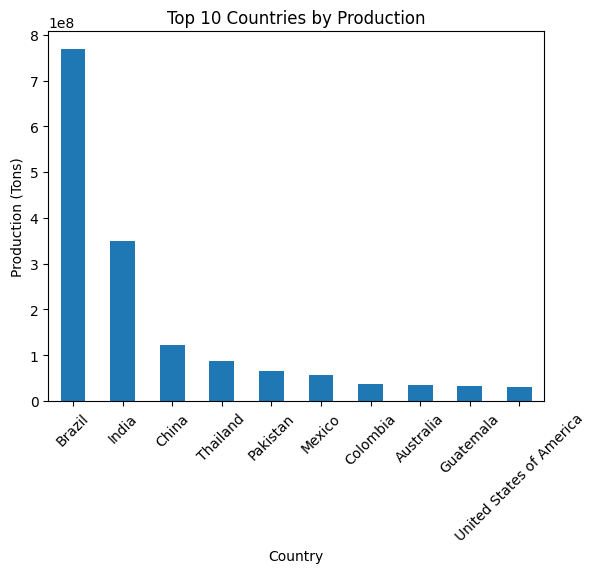

In [19]:
# Slice the top 10 countries
top_10_countries = top_countries.head(10)

# Plot the top 10 countries
top_10_countries.plot(kind='bar', xlabel='Country', ylabel='Production (Tons)', title='Top 10 Countries by Production')
plt.xticks(rotation=45)
plt.show()


#How does the production vary across continents?

In [20]:
#grouped the data by continent and sum up production
production_by_continent = df.groupby("Continent")["Production(Tons)"].sum()



# Display the production by continent
print("Production by Continent:")
print(production_by_continent)


Production by Continent:
Continent
Africa            89681525.0
Asia             721930425.0
Europe                5823.0
North America    173995947.0
Oceania           36177574.0
South America    865588126.0
Name: Production(Tons), dtype: float64


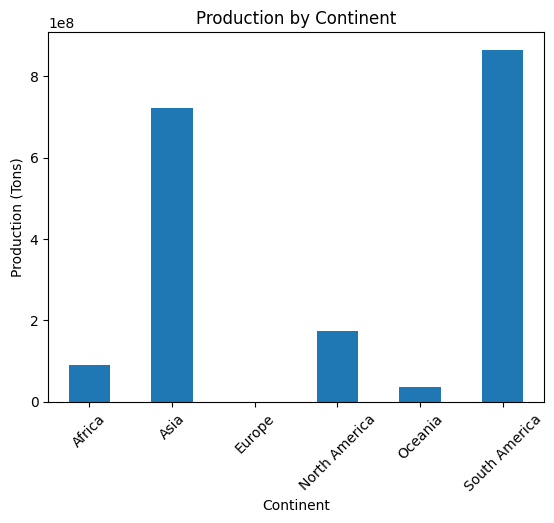

In [21]:
# Plot production by continent
production_by_continent.plot(kind='bar', xlabel='Continent', ylabel='Production (Tons)', title='Production by Continent')
plt.xticks(rotation=45)
plt.show()


#How many countries produce sugarcane from each continent?

In [22]:
df["Continent"].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

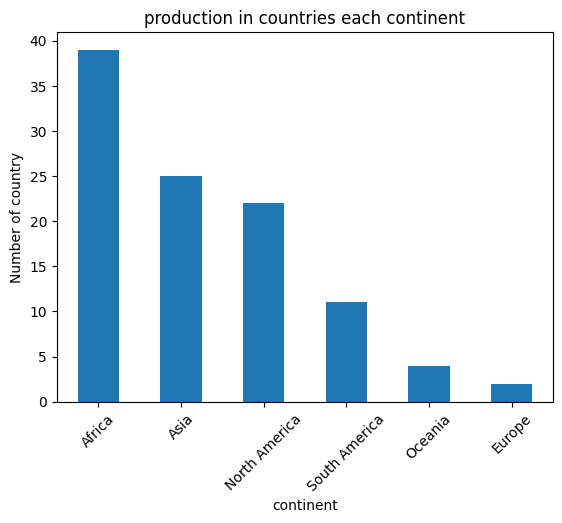

In [23]:
df["Continent"].value_counts().plot(kind ='bar',xlabel='continent',ylabel='Number of country',title='production in countries each continent')
plt.xticks(rotation =45)
plt.show()

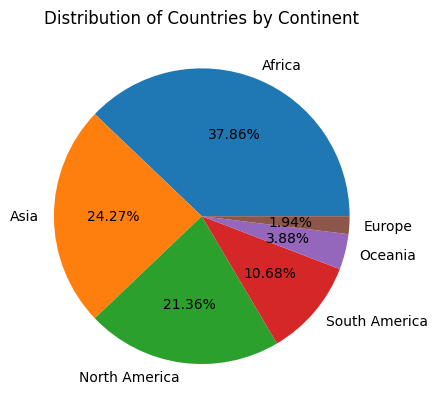

In [24]:
df['Continent'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribution of Countries by Continent')
plt.ylabel('')
plt.show()

#2-Production per Person:



#Which countries have the highest production per person (Kg)?

In [25]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [26]:
# Find the country with the highest production per person
highest_production_per_person = df.loc[df['Production_per_Person(Kg)'].idxmax()]

# Display the result
print("Country with the highest production per person (Kg):",highest_production_per_person['Country'])



Country with the highest production per person (Kg): Paraguay


#How does production per person vary across continents?

In [34]:
production_vary_over_continent = df.groupby("Continent")["Production_per_Person(Kg)"].sum()
production_vary_over_continent.sort_values(ascending=False)
print("production per person vary across continents :")
print(production_vary_over_continent)

production per person vary across continents :
Continent
Africa           2332687.293
Asia             1857769.303
Europe               536.000
North America    3796081.508
Oceania            28593.605
South America    3505531.738
Name: Production_per_Person(Kg), dtype: float64


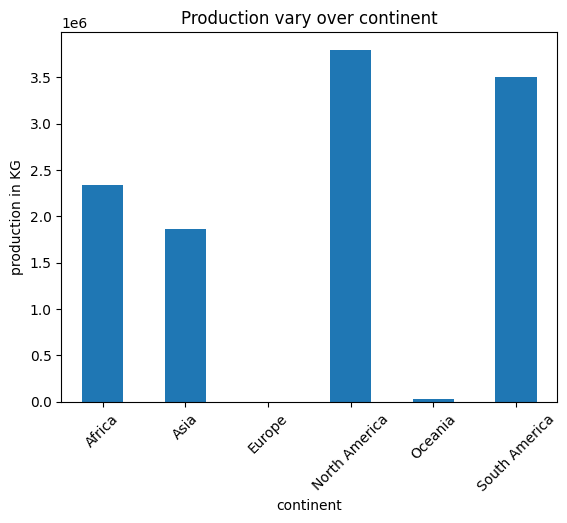

In [35]:
production_vary_over_continent.plot(kind='bar',xlabel='continent',ylabel='production in KG',title = 'Production vary over continent')
plt.xticks(rotation =45)
plt.show()

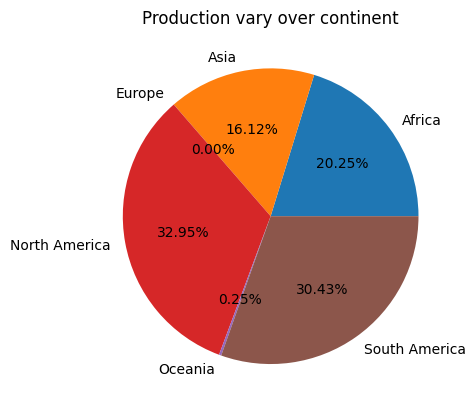

In [36]:
production_vary_over_continent.plot(kind='pie',autopct ='%1.2f%%')
plt.title("Production vary over continent")
plt.ylabel('')
plt.show()

#Is there any correlation between production per person and other factors such as acreage or yield?

In [38]:
# Calculate correlation coefficients
correlation = df[['Production_per_Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg / Hectare)']].corr()

# Display correlation matrix
correlation



,Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production_per_Person(Kg),1.000000,0.012532,0.017963
Acreage(Hectare),0.012532,1.000000,0.113433
Yield(Kg / Hectare),0.017963,0.113433,1.000000


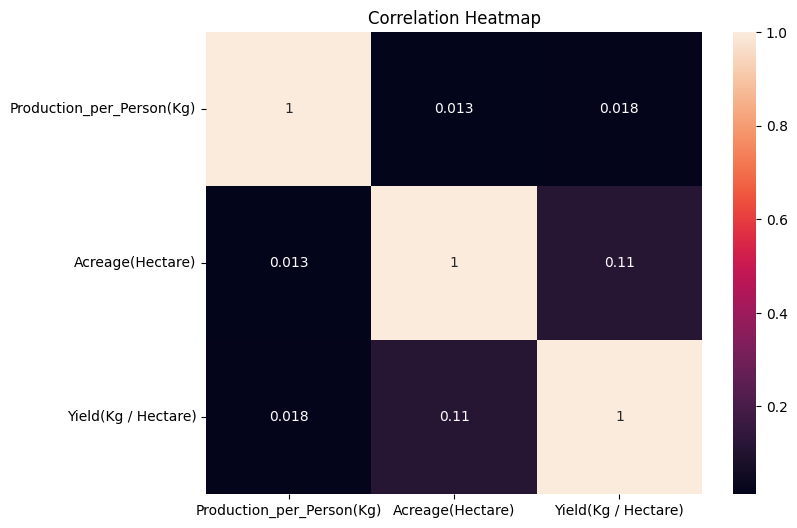

In [39]:
# Calculate correlation matrix
correlation = df[['Production_per_Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg / Hectare)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()


#3-Acreage Analysis:




#Which countries have the largest acreage dedicated to agriculture?

In [40]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [41]:
#country have largest acreage

largest_acreage_country = df.iloc[df['Acreage(Hectare)'].idxmax()]
print("country have largest acreage :",largest_acreage_country["Country"])

country have largest acreage : Brazil


#How does the acreage vary across continents?

In [42]:
acreage_vary_across_continents = df.groupby("Continent")["Acreage(Hectare)"].sum()
print(acreage_vary_across_continents.sort_values(ascending=True))

Continent
Europe           7.100000e+01
Oceania          4.909090e+05
North America    1.581983e+06
Africa           1.688987e+06
Asia             1.060832e+07
South America    1.136924e+07
Name: Acreage(Hectare), dtype: float64


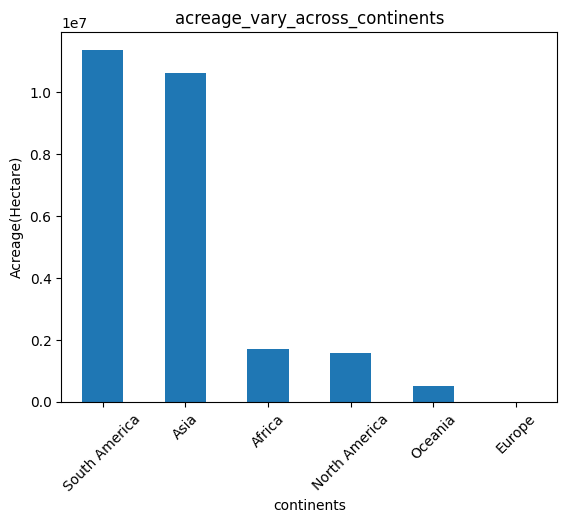

In [43]:
acreage_vary_across_continents.sort_values(ascending=False).plot(kind= 'bar',xlabel='continents',ylabel='Acreage(Hectare)',title='acreage_vary_across_continents')
plt.xticks(rotation =45)
plt.show()

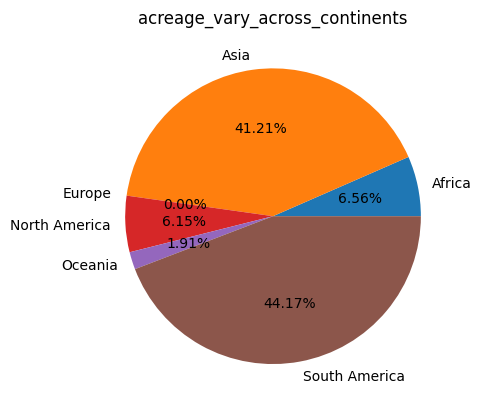

In [44]:
acreage_vary_across_continents.plot(kind= 'pie',autopct='%1.2f%%')
plt.title("acreage_vary_across_continents")
plt.ylabel("")
plt.show()

#Is there any relationship between acreage and production?

In [45]:

correlations =df[["Acreage(Hectare)","Production(Tons)"]].corr()
print(correlations)

                  Acreage(Hectare)  Production(Tons)
Acreage(Hectare)          1.000000          0.997314
Production(Tons)          0.997314          1.000000


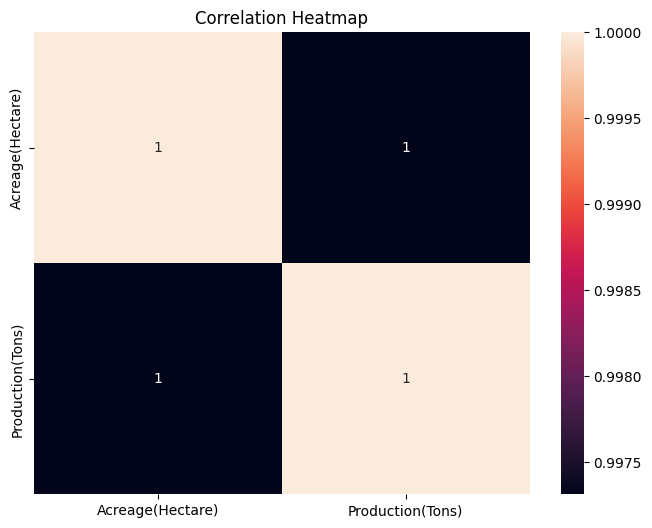

In [46]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#4-Yield Analysis:


#Which countries have the highest yield (Kg/Hectare)?

In [47]:
#country having highest yield(kg/Hectare)

country_with_highest_yield = df.iloc[df['Yield(Kg / Hectare)'].idxmax()]
print("country having highest yield(kg/Hectare) :",country_with_highest_yield['Country'])

country having highest yield(kg/Hectare) : Guatemala


#How does yield vary across continents?

In [48]:
Yield_vary_across_continents = df.groupby("Continent")["Yield(Kg / Hectare)"].sum()
print(Yield_vary_across_continents)

Continent
Africa           2.194736e+06
Asia             1.171871e+06
Europe           1.318709e+05
North America    1.082602e+06
Oceania          1.624191e+05
South America    6.771927e+05
Name: Yield(Kg / Hectare), dtype: float64


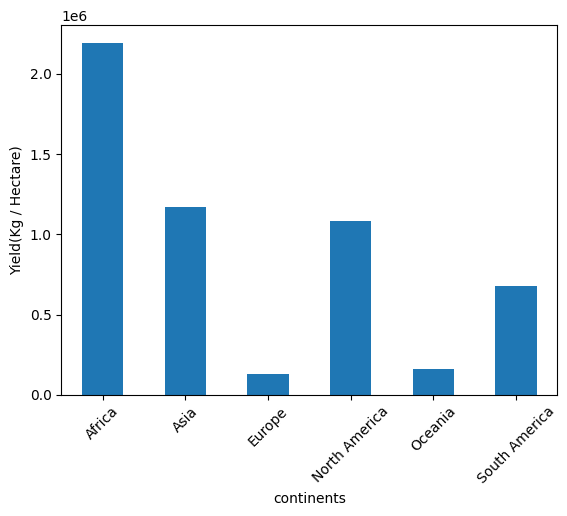

In [49]:
Yield_vary_across_continents.plot(kind='bar',xlabel='continents',ylabel='Yield(Kg / Hectare)')
plt.xticks(rotation=45)
plt.show()

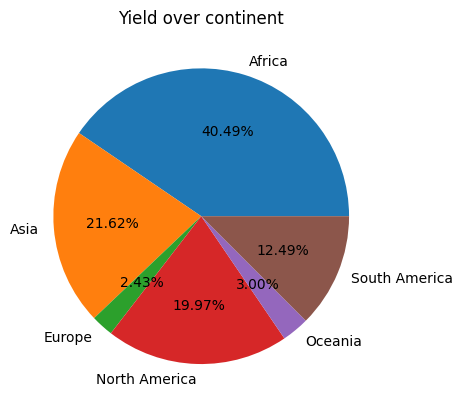

In [50]:
Yield_vary_across_continents.plot(kind='pie',autopct='%1.2f%%')
plt.title("Yield over continent")
plt.ylabel("")
plt.show()

#Is there any correlation between yield and other factors such as production or acreage?

In [51]:
correlations = df[['Yield(Kg / Hectare)','Production(Tons)']].corr()
print(correlations)

                     Yield(Kg / Hectare)  Production(Tons)
Yield(Kg / Hectare)             1.000000          0.132781
Production(Tons)                0.132781          1.000000


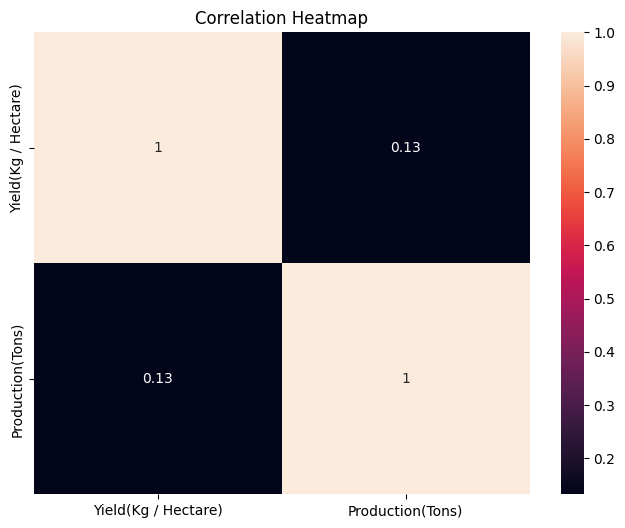

In [52]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#5-Regional Comparisons:


#Compare the agricultural statistics (production, acreage, yield) across different continents.

In [53]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [54]:
# Group by continent and calculate the sum of production, acreage, and yield
continent_stats = df.groupby('Continent').agg({
    'Production(Tons)': 'sum',
    'Acreage(Hectare)': 'sum',
    'Yield(Kg / Hectare)': 'mean'
})

# Print or visualize the aggregated statistics
print(continent_stats)


               Production(Tons)  Acreage(Hectare)  Yield(Kg / Hectare)
Continent                                                             
Africa               89681525.0      1.688987e+06         56275.271242
Asia                721930425.0      1.060832e+07         46874.856000
Europe                   5823.0      7.100000e+01         65935.450000
North America       173995947.0      1.581983e+06         49209.200000
Oceania              36177574.0      4.909090e+05         40604.775000
South America       865588126.0      1.136924e+07         61562.972727


In [55]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,1.030000e+02,103.000000,1.030000e+02,103.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.131416e+06,30354.775645
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.105000e+03,29757.650000
50%,1.422432e+06,25481.000000,1.675100e+04,54039.700000
75%,6.145648e+06,144004.500000,8.175850e+04,73106.300000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


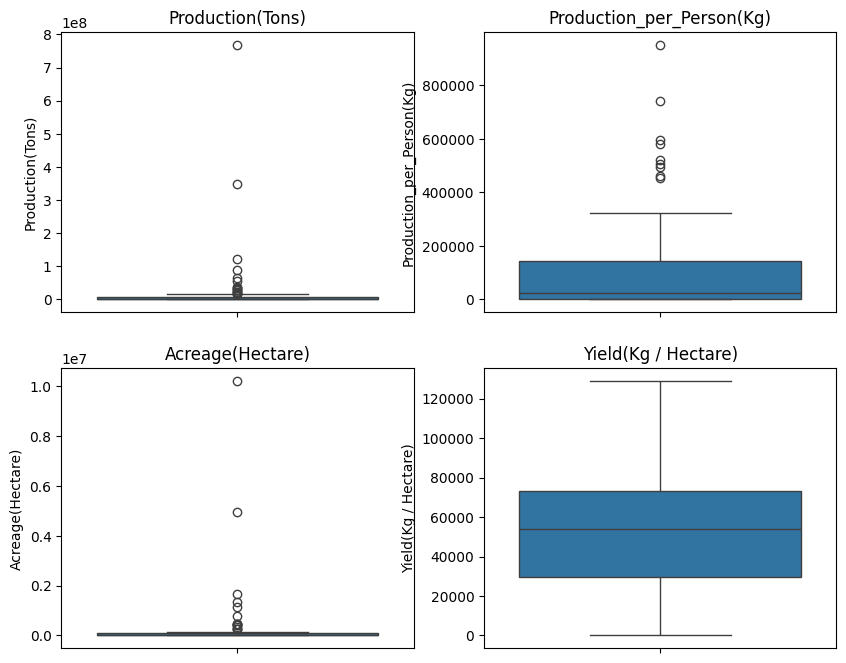

In [56]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_Person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg / Hectare)"])
plt.title("Yield(Kg / Hectare)")
plt.show()

#6-Correlation Analysis:


#Investigate correlations between different variables such as production, acreage, yield, and production per person.

In [57]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [59]:
correlations_var = df[['Production(Tons)','Production_per_Person(Kg)','Acreage(Hectare)','Yield(Kg / Hectare)']].corr()
correlations_var

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production(Tons),1.000000,0.016341,0.997314,0.132781
Production_per_Person(Kg),0.016341,1.000000,0.012532,0.017963
Acreage(Hectare),0.997314,0.012532,1.000000,0.113433
Yield(Kg / Hectare),0.132781,0.017963,0.113433,1.000000


#Visualize correlations using scatter plots or correlation matrices.

<Axes: >

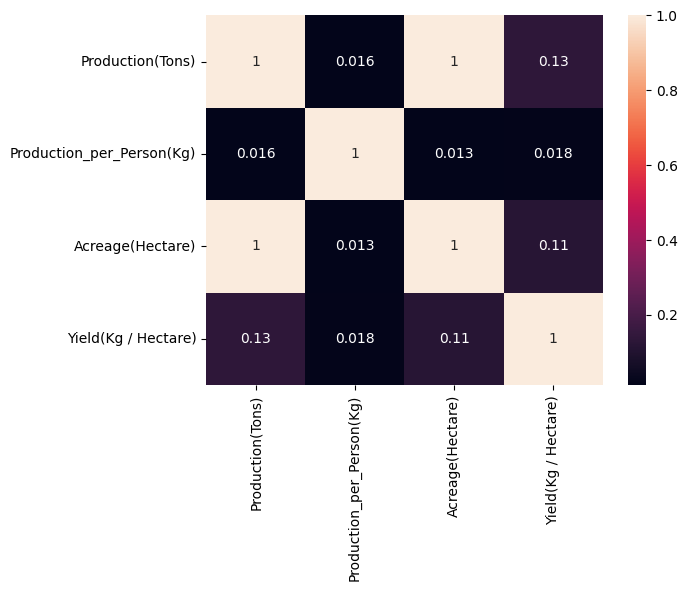

In [60]:
sns.heatmap(correlations_var,annot=True)

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

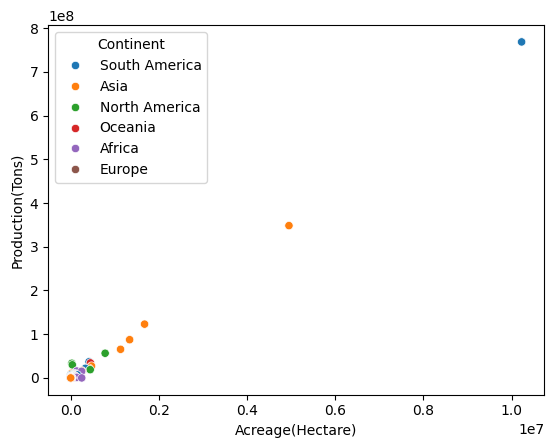

In [ ]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

#7-Top Contributors:


#Identify the top contributing countries for each agricultural metric (production, acreage, yield).

In [ ]:
# Group by country and calculate the sum of production, acreage, and mean yield
country_stats = df.groupby('Country').agg({
    'Production(Tons)': 'sum',
    'Acreage(Hectare)': 'sum',
    'Yield(Kg / Hectare)': 'sum'
})

# Identify top contributing countries for each metric
top_countries_production = country_stats.nlargest(5, 'Production(Tons)')
top_countries_acreage = country_stats.nlargest(5, 'Acreage(Hectare)')
top_countries_yield = country_stats.nlargest(5, 'Yield(Kg / Hectare)')

print("Top contributing countries for Production:")
print(top_countries_production)
print("\nTop contributing countries for Acreage:")
print(top_countries_acreage)
print("\nTop contributing countries for Yield:")
print(top_countries_yield)


Top contributing countries for Production:
          Production(Tons)  Acreage(Hectare)  Yield(Kg / Hectare)
Country                                                          
Brazil         768678382.0        10226205.0              75167.5
India          348448000.0         4950000.0              70393.5
China          123059739.0         1675215.0              73459.1
Thailand        87468496.0         1336575.0              65442.2
Pakistan        65450704.0         1130820.0              57879.0

Top contributing countries for Acreage:
          Production(Tons)  Acreage(Hectare)  Yield(Kg / Hectare)
Country                                                          
Brazil         768678382.0        10226205.0              75167.5
India          348448000.0         4950000.0              70393.5
China          123059739.0         1675215.0              73459.1
Thailand        87468496.0         1336575.0              65442.2
Pakistan        65450704.0         1130820.0              

#8-Distribution Analysis:


#Visualize the distribution of production, acreage, yield, and production per person using histograms or kernel density estimates.

Text(0.5, 1.0, 'Production_per_Person(Kg)')

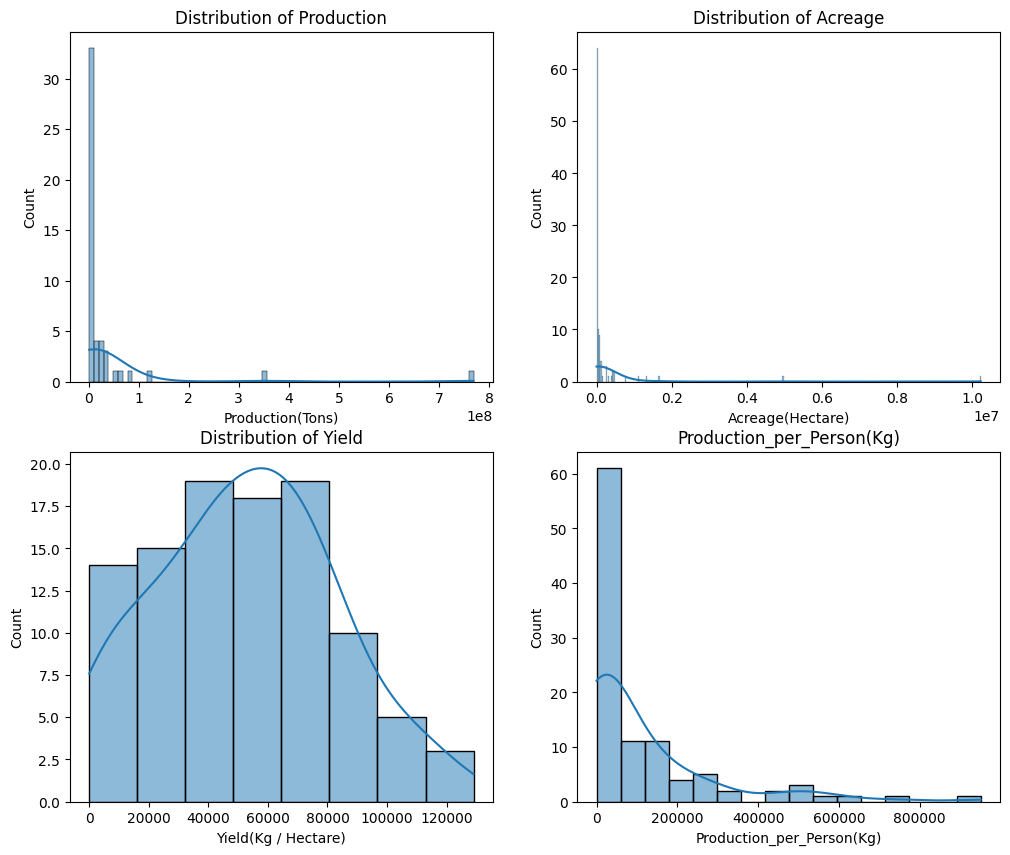

In [ ]:

# Plot histograms or kernel density estimates for each variable
plt.figure(figsize=(12, 10))

# Production
plt.subplot(2, 2, 1)
sns.histplot(df['Production(Tons)'].head(50), kde=True)
plt.title('Distribution of Production')

# Acreage
plt.subplot(2, 2, 2)
sns.histplot(df['Acreage(Hectare)'], kde=True)
plt.title('Distribution of Acreage')

# Yield
plt.subplot(2, 2, 3)
sns.histplot(df['Yield(Kg / Hectare)'], kde=True)
plt.title('Distribution of Yield')

#Production_per_Person(Kg)
plt.subplot(2, 2, 4)
sns.histplot(df['Production_per_Person(Kg)'],kde=True)
plt.title('Production_per_Person(Kg)')